<a href="https://colab.research.google.com/github/MosinInamdar/AgileSattva/blob/main/Machine_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
# Perform following tasks:
# 1. Pre-process the dataset.
# 2. Identify outliers.
# 3. Check the correlation.
# 4. Implement linear regression and random forest regression models.
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
# Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-datase

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
data = pd.read_csv("uber.csv")

data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


Missing values in the dataset:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64
Missing values after handling:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


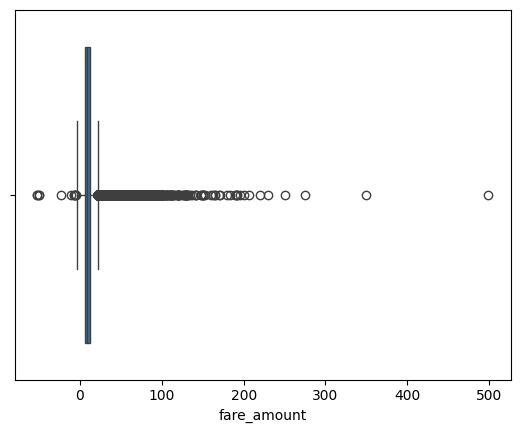

In [ ]:
# 1. Pre-process the dataset

# Remove unnecessary column
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])

missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Handle missing values
# We can choose to drop rows with missing values or fill them with appropriate values.

data.dropna(inplace=True)

# To fill missing values with the mean value of the column:
# data.fillna(data.mean(), inplace=True)

# Ensure there are no more missing values
missing_values = data.isnull().sum()
print("Missing values after handling:")
print(missing_values)

# 2. Identify outliers
# visualization to detect outliers.
sns.boxplot(x=data["fare_amount"])
plt.show()

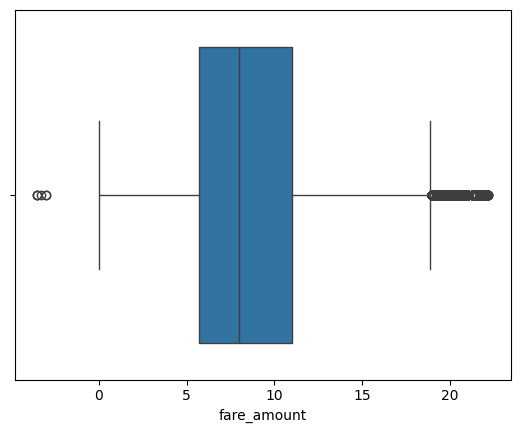

In [ ]:
# Calculate the IQR for the 'fare_amount' column
Q1 = data["fare_amount"].quantile(0.25)
Q3 = data["fare_amount"].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold (e.g., 1.5 times the IQR) to identify outliers
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Remove outliers
data_no_outliers = data[(data["fare_amount"] >= lower_bound) & (data["fare_amount"] <= upper_bound)]

# Visualize the 'fare_amount' distribution without outliers
sns.boxplot(x=data_no_outliers["fare_amount"])
plt.show()

,0
Unnamed: 0,"Axes(0.125,0.786098;0.352273x0.0939024)"
fare_amount,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
pickup_latitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.547727,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.125,0.448049;0.352273x0.0939024)"


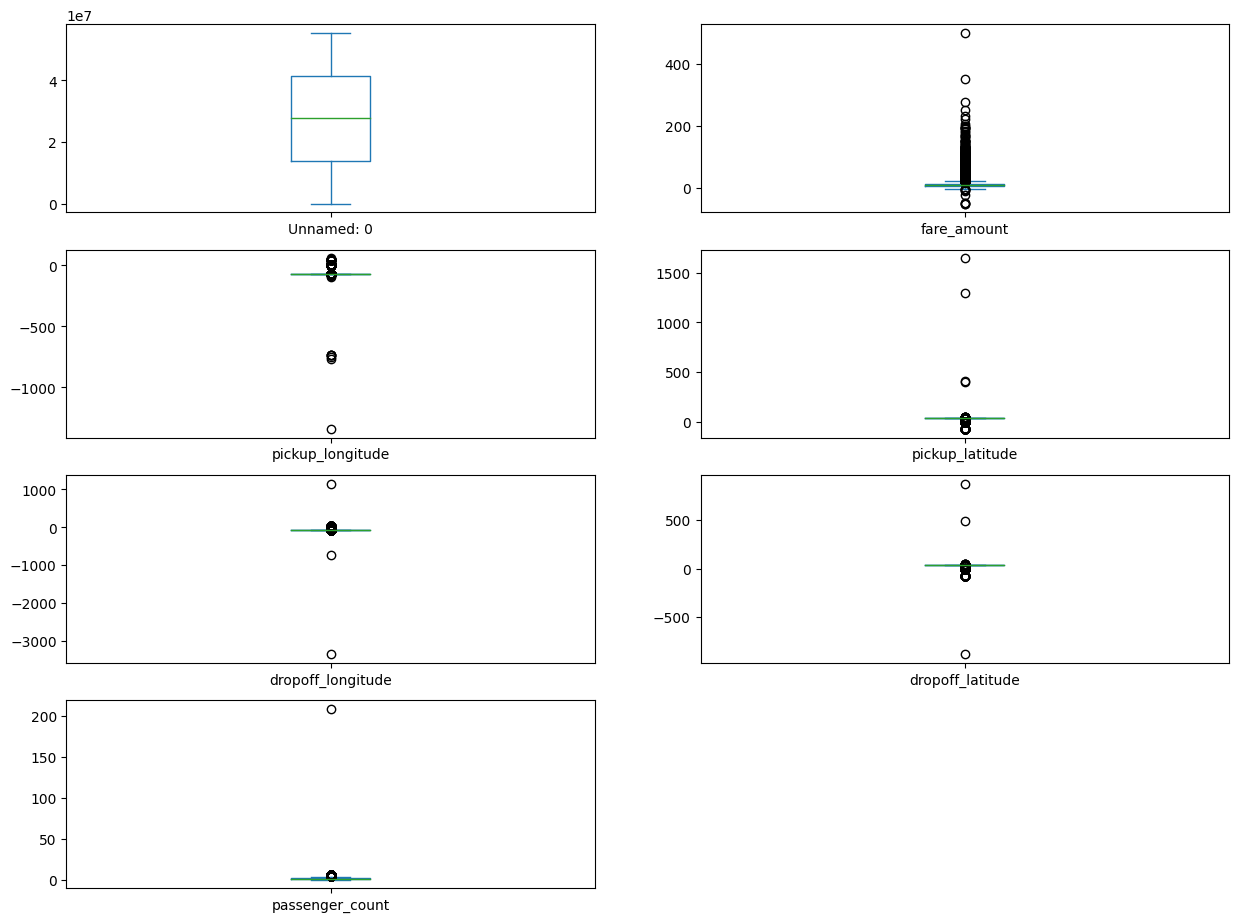

In [ ]:
data.plot(kind="box",subplots=True, layout=(7, 2), figsize=(15, 20))

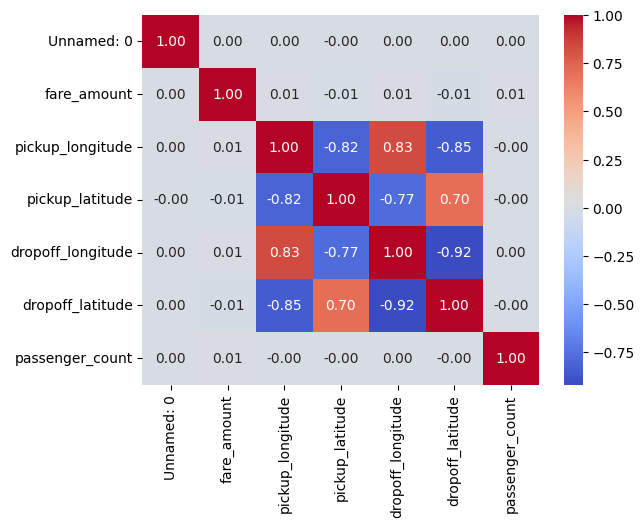

In [ ]:
# Exclude non-numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the plot
plt.show()


In [ ]:
# 4. Implement linear regression and random forest regression models
# Split the data into features and target variable
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']  #Target

y

,fare_amount
0,7.5
1,7.7
2,12.9
3,5.3
4,16.0
...,...
199995,3.0
199996,7.5
199997,30.9
199998,14.5


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Create and train the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 5. Evaluate the models
# Predict the values
y_pred_lr = lr_model.predict(X_test)
y_pred_lr
print("Linear Model:",y_pred_lr)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model:", y_pred_rf)

Linear Model: [11.29237916 11.29171388 11.5718662  ... 11.29183291 11.43252639
 11.29190248]
Random Forest Model: [ 9.26    5.043  12.577  ...  6.8057 11.264   8.304 ]


In [ ]:
# Calculate R-squared (R2) and Root Mean Squared Error (RMSE) for both models
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

In [ ]:
# Compare the scores
print("Linear Regression - R2:", r2_lr)
print("Linear Regression - RMSE:", rmse_lr)

Linear Regression - R2: 0.00034152697863043535
Linear Regression - RMSE: 10.197470623964248


In [ ]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regression R2:", r2_rf)
print("Random Forest Regression RMSE:",rmse_rf)

Random Forest Regression R2: 0.701102567545169
Random Forest Regression RMSE: 5.576063738722296


In [ ]:
# Overall Analysis

# The Random Forest Regression model has significantly improved the predictive performance.
# An R-squared (R2) value of approximately 0.701 and a Root Mean Squared Error (RMSE)
# of approximately 5.575 indicate that the Random Forest model is capturing a substantial portion
# of the variance in the target variable and providing more accurate predictions compared to the linear regression model.